In [ ]:
!pip install openai

!pip install transformers
!pip install Sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from openai import OpenAI
import re
import plotly.graph_objects as go

from transformers import AutoTokenizer, AutoModelForMaskedLM
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
import pandas as pd
from transformers import BertTokenizer, BertModel
import json
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [ ]:
prob = """
   The fashion industry is the second-largest polluter in the world, right after the oil industry.
   Every year, the world consumes about 80 billion new pieces of clothing, and this production consumes resources, raises the carbon footprint, and produces waste.
   The fast fashion cycle encourages this overconsumption model, causing tremendous stress on our planet's resources
"""


sol = """
Our solution to this is to transform the way we consume fashion through the creation of a shared fashion platform –
a fashion library. The fashion library will function on the concept of lending versus owning; it's like Airbnb but for clothes.
Customers become members and can borrow from a vast clothing collection for a duration of their choice, starting from day-long
rentals for special occasions to month-long arrangements for regular wear. The clothes are then returned, cleaned, and made available
again for the second round. This creates a constantly rotating wardrobe, reducing the need for production of new clothes, thus minimizing
environmental footprint and wastage.  This library could contain pieces from a variety of sources including designer collaborations, garments
 from sustainable brands, donations from individuals, and more. It encourages the reuse and recycling of garments, immensely reducing the
 environmental impact caused by constant production.  From a financial perspective, this model can be lucrative for businesses as it provides
 access to a larger customer base; consumers who typically can't afford designer or high-quality sustainable clothing can now access these pieces
  at a fraction of the cost.   The feasibility and scalability of such a concept have already been proven with successful pilot projects in cities like
  New York and London. With increasing environmental consciousness
 among consumers, this model has the potential to disrupt and transform the fashion industry, making it more circular, sustainable, and inclusive
"""


problem_solution_pair = "\n --------- PROBLEM PROBLEM PROBLEM PROBLEM PROBLEM  ----------------- \n ------------------------------------------------------------------------------------------------------------\n\n\n"+prob+ "\n --------- SOLUTION SOLUTION SOLUTION SOLUTION SOLUTION  -----------------   \n " + sol + '\n------------------------------------------------------------------------------------------------------------\n\n\n'

In [ ]:
print(problem_solution_pair)


 --------- PROBLEM PROBLEM PROBLEM PROBLEM PROBLEM  ----------------- 
 ------------------------------------------------------------------------------------------------------------



   The fashion industry is the second-largest polluter in the world, right after the oil industry. 
   Every year, the world consumes about 80 billion new pieces of clothing, and this production consumes resources, raises the carbon footprint, and produces waste. 
   The fast fashion cycle encourages this overconsumption model, causing tremendous stress on our planet's resources

 --------- SOLUTION SOLUTION SOLUTION SOLUTION SOLUTION  -----------------   
 
Our solution to this is to transform the way we consume fashion through the creation of a shared fashion platform – 
a fashion library. The fashion library will function on the concept of lending versus owning; it's like Airbnb but for clothes.   
Customers become members and can borrow from a vast clothing collection for a duration of their choice, 

In [ ]:
params = [
    "Resource Avaibilty",
    "Waste to product ratio",
    "Renewablity",
    "biodegradability",
    "% of Recyclable product",
    "Qualty of the waste",

    "Longevity",
    "Recyclability",
    "Cost of Repair",

    "PaaS",
    "EPR",
    "Scale of infrastructure needed",
    "Manpower needed",

    "Digital feasibility",
    "Necessity of innovation hubs",
    "Scalabilty",
    "Necessity of research on solution",

    "Environmental Impact",
    "Outlandish Idea Score",
    "Number of Maximum Cycles",
    "Return @ Cycle"
]

In [ ]:
def create_reqs(problem_solution_pair):
  problem_and_solution = problem_solution_pair

  request1 = f"""
  You are AI conversating with human. Give answer based on {problem_and_solution} .

  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.
  Consider the following points and assign a score out of 10 based on relevance, feasibility, and economic aspects. Also, mention a brief explanation
  behind assigning the scores for each aspects. Always answer in this way along with explanantion and score and the vector. Dont miss any point/section.
  Providing Explanation is a MUST. Providing Explanation is a MUST. IF SOLUTION DOES NOT COMPLY WITH PROBLEM GIVE VERY POOR SCORE.

  Initial Assessment:
  1. Resource Mapping: Evaluate resources, materials, and energy flows. The higher the abundance of the product as resource in nature, the higher its score will be. (Score: a/10)
  2. Waste Audit: Measure and analyze the extent of wastage. To what scale waste is produced from the product, i.e. waste to product ratio. More waste means more score. (Score: b/10)

  Design for Circularity:
  3. Renewable: Discuss the use of renewable materials. The higher the product's renewable nature, the higher its score. (Score: c/10)
  4. Biodegradable: Consider biodegradable material usage. The degree of biodegradability exhibited by the product. (Score: d/10)
  5. Recyclable: Highlight the use of recyclable materials. What is the extent to which a product can be recycled without any decrease in its return?. (Score: e/10)
  6. Quality of the waste. The higher the quality, such as recovery, the higher the assigned score.  (Score: f/10)


  Create a 6 dimentional vector considering the scores following the above order. Only use integer. STRICTLY FOLLOW THE PATTERN BELLOW for 6 DIMENTIONAL vector
  Vector: [a,b,c,d,e,f]
  """


  request2 = f"""
  You are AI conversating with human. Give answer based on {problem_and_solution} .

  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.
  Consider the following points and assign a score out of 10 based on relevance, feasibility, and economic aspects. Also, mention a brief explanation
  behind assigning the scores for each aspects. Always answer in this way along with explanantion and score and the vector. Dont miss any point/section.
  Providing Explanation is a MUST. Providing Explanation is a MUST. IF SOLUTION DOES NOT COMPLY WITH PROBLEM GIVE VERY POOR SCORE.

  Key Product in involved in the problem: product_name with brief description

  Product Design:
  1. Longevity: Describe product longevity strategies. What is the Longevity of the product? higher the Longevity, the higher the score(Score: a/10)
  2. Recyclability: Explain product recyclability features. To what extent is the product can be recycled?  higher the Recyclability, the higher the score(Score: b/10)
  3. Ease of Repair: Emphasize repair-friendly design. What is the cost of repairing the residuals into a product? higher the cost, the higher the score(Score: c/10)

  Business Model Innovation:
  4. Product-as-a-Service (PaaS):
    - Lease or share products for ownership retention. (Score: d/10)

  5. Extended Producer Responsibility (EPR):
    - Focus on product maintenance responsibilities. Higher the need for maintenance, higher the score. (Score: e/10)

  6. Infrastructure Development:
    - Discuss the establishment of recycling facilities, remanufacturing centers, and collection systems. How much is the need for building factories, machineries, setup to iniate the cycle process? Higher the need, higher the score(Score: f/10)

  7. Manpower:
    - Address human resources involved in circular practices. How much people should be hired more to ensure the cycle? Higher the human resources needed , higher the score. (Score: g/10)


  Create a 7 dimentional vector considering the scores following the above order. Only use integer. STRICTLY FOLLOW THE PATTERN BELLOW for 7 DIMENTIONAL vector
  Vector: [a,b,c,d,e,f,g]
  """

  request3 = f"""
  You are AI conversating with human. Give answer based on {problem_and_solution} .

  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.
  Consider the following points and assign a score out of 10 based on relevance, feasibility, and economic aspects. Also, mention a brief explanation
  behind assigning the scores for each aspects. Always answer in this way along with explanantion and score and the vector. Dont miss any point/section.
  Providing Explanation is a MUST. Providing Explanation is a MUST. IF SOLUTION DOES NOT COMPLY WITH PROBLEM GIVE VERY POOR SCORE.

  Technology and Innovation:
  1. Digital Solutions:
    - Explore aspects of digital solutions for circular economy practices. To what extent is the solution to the problem feasible to exist in digital form?  higher the feasibility, the higher the score.(Score: a/10)

  2. Innovation Hubs:
      - Discuss hardware and software innovation hubs. Is building Innovation Hubs necessary for implementing the idea?  higher the necessity, the higher the score.(Score: b/10)

  Scaling and Expansion:
  3. Scaling Up:
      - Expand successful circular initiatives across organizations, communities, or industries. To what extent can the solution be scaled to a larger scope?  higher the scope, the higher the score(Score: c/10)

  4. Continuous Improvement:
      - Always seek opportunities for further improvement and innovation. To what extent is research and innovation necessary to achieve the optimal performance of the solution? The higher the scope, the higher the score(Score: d/10)

  Create a 4 dimentional vector considering the scores following the above order. Only use integer. STRICTLY FOLLOW THE PATTERN BELLOW for 5 DIMENTIONAL vector
  Vector: [a,b,c,d]
  """

  request4 = f"""
  You are AI conversating with human. Give answer based on {problem_and_solution} .

  Your AI tool aims to assist in evaluating ideas within the context of Circular Economy by assessing problem and solution pairs.
  Streamline the evaluation process, enhancing the accuracy and efficiency of selecting optimal solutions.
  Consider the following points and assign a score out of 10 based on relevance, feasibility, and economic aspects. Also, mention a brief explanation
  behind assigning the scores for each aspects. Dont overestimate or underestimate the scores. Always answer in this way along with explanantion and score and the vector. Dont miss any point/section.
  Providing Explanation is a MUST. Providing Explanation is a MUST. IF SOLUTION DOES NOT COMPLY WITH PROBLEM GIVE VERY POOR SCORE.

  Strength of Idea:
  1. Environmental Impact: Measure the environmental effects of the proposed ideas. (Score:  a/10)
  2. Outlandish Idea Score: Evaluate the novelty compared to existing and state-of-the-art ideas. (Score:  b/10)
  3. Number of Maximum Cycles: Assess the number of maximum cycles the idea supports. (Score:  c/10)
  4. Return @ Cycle (Damping Effect): Calculate the return considering damping effect at each cycle. (Score:  d/10)


  Create a 4 dimentional vector considering the scores following the above order. Only use integer. STRICTLY FOLLOW THE PATTERN BELLOW for 4 DIMENTIONAL vector
  Vector: [a,b,c,d]
  """

  return request1,request2,request3,request4

# Different Solutions By GPT

In [ ]:
def get_gpt_q(prob,specifications=[]):
    num_solns=5
    while len(specifications)<5:
        specifications.append("all the salient points from above")

    gpt_q = f"""
    Problem:
    {prob}

    You are an AI tool tasked with presenting five distinct solutions to address this problem within the realm of Circular Economy.
    Each solution should be succinct, encapsulated within 150 to 200 words.
    Feel free to draw inspiration from internet resources and current industry standards.
    Each proposed ideas should encompass aspects such as renewability, sustainability,
    longevity, recyclability, environmental impact, innovation, digital elements, and scalability.
    Present these five unique ideas concisely, following this specified pattern. Keep each idea in *** ... ### block.
    """
    for index,specification in enumerate(specifications):
        gpt_q+=f"""
        {index+1}. Solution {index+1} on the basis of {specification}
        ***
            (150-200) words
        ###
        """
    return gpt_q

# Wrapping It Up

In [ ]:
class SparseModel:
  def __init__(self):
    self.DEVICE =  'cuda' if torch.cuda.is_available() else 'cpu'
    self.model = AutoModelForMaskedLM.from_pretrained("naver/splade-cocondenser-selfdistil").to(self.DEVICE)
    self.sparse_tokenizer = AutoTokenizer.from_pretrained("naver/splade-cocondenser-selfdistil")


  def decode_sparse_dict(self, sparse_dict,trim=None):
    a = np.zeros((30522))
    a[sparse_dict['indices']] = sparse_dict['values']
    if trim is not None:
      a[a.argsort()[:-trim]] = 0
    return a

  def formalize(self, sparse_dict):

    idx2token = {idx: token for token, idx in self.sparse_tokenizer.get_vocab().items()}

    sparse_dict_tokens = {
        idx2token[idx]: weight for idx, weight in zip(sparse_dict['indices'], sparse_dict['values'])
    }
    sparse_dict_tokens = {
        k: v for k, v in sorted(
            sparse_dict_tokens.items(),
            key=lambda item: item[1],
            reverse=True
        )
    }
    return sparse_dict_tokens


  def __call__(self, text):

    input_ids = self.sparse_tokenizer(text, return_tensors='pt').to(self.DEVICE)
    with torch.no_grad():
      logits = self.model(**input_ids).logits

    sparse_vec = torch.max(
        torch.log(
            1+torch.relu(logits)
        )*input_ids.attention_mask.unsqueeze(-1),
    dim=1)[0].squeeze();

    indices = sparse_vec.nonzero().squeeze().cpu().tolist()
    values = sparse_vec[indices].cpu().tolist()
    sparse_dict = {'indices': indices, 'values': values}

    return np.array(sparse_vec.cpu()),sparse_dict




class DenseModel:
  def __init__(self):
    self.DEVICE =  'cuda' if torch.cuda.is_available() else 'cpu'
    self.model = SentenceTransformer('msmarco-bert-base-dot-v5',device=self.DEVICE) #clip-ViT-B-32

  def __call__(self, text):
    dense_vec = self.model.encode(text).tolist()
    return  np.array(dense_vec)

In [ ]:
class UniquenessChecker:
  def __init__(self, prob_path, sol_path, prob_sparse_path, sol_sparse_path):
    self.dense_model = DenseModel()
    self.sparse_model = SparseModel()

    self.problems_enc = np.load(prob_path)
    self.solutions_enc = np.load(sol_path)

    with open(prob_sparse_path, 'r') as json_file:
        self.problems_enc_sparse = json.load(json_file)

    with open(sol_sparse_path, 'r') as json_file:
        self.solutions_enc_sparse = json.load(json_file)


  def find_top_matches_sparse(self,sol_list, prob_list, given_sol,given_prob, sol_id, top_k=2,trim=None):
      # Calculate cosine similarity between given_prob and all embeddings in prob list
      cosine_similarities_sol = cosine_similarity([self.sparse_model.decode_sparse_dict(given_sol,trim)], [self.sparse_model.decode_sparse_dict(x,trim) for x in sol_list])
      cosine_similarities_prob = cosine_similarity([self.sparse_model.decode_sparse_dict(given_prob,trim)], [self.sparse_model.decode_sparse_dict(x,trim) for x in prob_list])

      # Get the indices of top k most similar embeddings in prob list
      top_indices = np.argsort(cosine_similarities_sol[0])[-top_k:][::-1]
      top_indices = top_indices[top_indices != sol_id]

      top_sim_scores_sol = cosine_similarities_sol[0][top_indices]
      top_sim_scores_prob = cosine_similarities_prob[0][top_indices]

      aggr_sim_score = np.max(top_sim_scores_sol*top_sim_scores_prob)

      return top_indices,top_sim_scores_sol,top_sim_scores_prob, aggr_sim_score

  def check(self,my_prob,my_sol, sol_id):
    # my_prob_enc = self.dense_model(my_prob)
    # my_sol_enc = self.dense_model(my_sol)

    _,my_prob_enc_sparse = self.sparse_model(' '.join(my_prob.split(' ')[:300]))
    _,my_sol_enc_sparse = self.sparse_model(' '.join(my_sol.split(' ')[:300]))

    print(self.sparse_model.formalize(my_sol_enc_sparse))


    # # Find top K matches in prob_list for the given_prob embedding
    # top_indices,top_sim_scores_sol,top_sim_scores_prob,aggr_sim_score = self.find_top_matches(self.solutions_enc,self.problems_enc, my_sol_enc,my_prob_enc, top_k=15)

    top_indices_sparse,top_sim_scores_sol_sparse,top_sim_scores_prob_sparse,aggr_sim_score_sparse = self.find_top_matches_sparse(self.solutions_enc_sparse,self.problems_enc_sparse, my_sol_enc_sparse,my_prob_enc_sparse, sol_id,top_k=15,trim=10)

    # _= (top_indices,top_sim_scores_sol,top_sim_scores_prob,aggr_sim_score),(top_indices_sparse,top_sim_scores_sol_sparse,top_sim_scores_prob_sparse,aggr_sim_score_sparse)

    return 1-aggr_sim_score_sparse

In [ ]:
class AIEvaluator:
  def __init__(self):
      self.api_key = 'API_KEY'
      self.client = OpenAI(api_key=self.api_key)
      self.unq = UniquenessChecker('/content/drive/MyDrive/genAi/problems_enc.npy','/content/drive/MyDrive/genAi/solutions_enc.npy','/content/drive/MyDrive/genAi/problems_enc_sparse.json','/content/drive/MyDrive/genAi/solutions_enc_sparse.json')

  def generate_content(self, prompt):
      completion = self.client.completions.create(
        model="gpt-3.5-turbo-instruct",
        prompt=prompt,
        max_tokens=3000,
      )
      return completion.choices[0].text.strip()

  def split_solutions(self, input_string):
      solutions = input_string.split("***")[1:]  # Split based on "***", ignoring the first empty element

      solutions_list = []
      for solution in solutions:
          solution_text = solution.split("###")[0].strip()  # Extract the text between "***" and "###"
          solutions_list.append(solution_text)

      return solutions_list

  def extract_vector(self,input_string):
      # Find the substring after "Vector: ["
      start_index = input_string.find(" [") + len(" [")

      # Extract substring containing only the vector elements until closing bracket ']'
      vector_string = input_string[start_index:]
      vector_string = vector_string.split(']')[0]  # Extract until the first ']'

      # Use regular expression to find all integers in the string
      vector_list = [int(num) for num in re.findall(r'\d+', vector_string)]

      return vector_list

  def evaluator(self,problem, solution):
    return_len = 0
    i = 0
    while return_len!=len(params):
      if i==1:
        print("Warning: Recovering ...")
      p_s = "\n Problem:   \n "+problem+ "\n Solution:   \n " + solution
      req1,req2,req3,req4 = create_reqs(p_s)

      res1 = self.generate_content(req1)
      res2 = self.generate_content(req2)
      res3 = self.generate_content(req3)
      res4 = self.generate_content(req4)

      vector_list1 = self.extract_vector(res1)
      vector_list2 = self.extract_vector(res2)
      vector_list3 = self.extract_vector(res3)
      vector_list4 = self.extract_vector(res4)

      res_full = '\n=========\n'.join([res1,res2,res3,res4])
      vector_list_full = vector_list1 + vector_list2 + vector_list3 + vector_list4
      return_len = len(vector_list_full)
      i+=1

    return res_full, vector_list_full


  def gpt_candidate(self,problem, round, specifications=[],fix_gpt_solver = True):
      question_for_gpt = get_gpt_q(problem,specifications)

      if fix_gpt_solver == False or round==0:
        print("GPTs are providing ideas...")
        self.gpt_sols = self.generate_content(question_for_gpt)


      res_full_0, vector_list_full_0 = self.evaluator(problem,self.gpt_sols[0])
      res_full_1, vector_list_full_1 = self.evaluator(problem,self.gpt_sols[1])
      res_full_2, vector_list_full_2 = self.evaluator(problem,self.gpt_sols[2])
      res_full_3, vector_list_full_3 = self.evaluator(problem,self.gpt_sols[3])
      res_full_4, vector_list_full_4 = self.evaluator(problem,self.gpt_sols[4])

      # Save as Text
      gpt_full_res = '********** GPT Solution **********\n\n\n'+'\n\n\n********** GPT Solution **********\n\n\n'.join([res_full_0,res_full_1,res_full_2,res_full_3,res_full_4])

      file_name = 'gpt_round'+str(round)+'_5solutions.txt'
      with open(file_name, 'w') as file:
        file.write(gpt_full_res)

      return vector_list_full_0,vector_list_full_1,vector_list_full_2,vector_list_full_3,vector_list_full_4

  def get_salient_points(self,problem,num_salient):
    uniq_tok="Vector"
    __p_index_string=[]
    for i in range(1,num_salient+1):
      __p_index_string.append(f"p{i}")

    prompt=f"""
      Strictly give me 5 salient topic names from this problem statement:{problem}
      STRICTLY ADHERE TO THIS FORMAT: return a vector of length {num_salient} with points {','.join(__p_index_string)} in this format. FORMAT IS BELOW
      {uniq_tok}: [{';'.join(__p_index_string)}]
    """

    content=""
    fail_index=0
    while True:
      fail_index+=1
      if fail_index>1:
        print("Recovering::warning")
      content:str=self.generate_content(prompt)
      # start_index=content.find(f"{uniq_tok}: [")
      # end_index=content.rfind("]")
      # if start_index==-1 or end_index==-1:
      #   continue
      # start_index+=len(f"{uniq_tok}: [")

      # points=content[start_index:end_index].split(';')
      points=self.get_tokenwise_parsed_data(f"{uniq_tok}: [","]",content,';')
      if len(points)>=num_salient:
        break

    return points[:num_salient]

  def get_tokenwise_parsed_data(self,start_token,end_token,content,sep):
    start_index=content.find(start_token)
    end_index=content.rfind(end_token)

    if start_index==-1 or end_index==-1:
      return []
    start_index+=len(start_token)
    if sep is None:
      content_list=content[start_index:end_index]
    else:
      content_list=content[start_index:end_index].split(sep)

    return content_list

  def moonshot_finder(self,problem,student_solution,num_main_points=10):
    tok1="Vector"
    __topic_string=';'.join(["topic"+str(i) for i in range(1,num_main_points+1)])
    main_points_prompt=f"""
      find top {num_main_points} salient points from this idea and STRICTLY provide them in the format AT THE VERY END OF THE RESPONSE:
      To overcome this ecological problem, we came up with the bricks, made from foundry dust and waste plastic.
      There is no use of water in the making of these bricks. Also, more water is saved during the construction process,
      as the walls built with these bricks do not need to be cured with water. Also, the best part of this idea is that while
      70 percent of the total sand can be reused, the other 30 percent, in the form of foundry dust, is too fine to be used again.
      Also, with enhanced technology we evolve this idea in making interlocking bricks, which essentially work like Lego blocks.
      STRICTLY PROVIDE IN THIS FORMAT and add to the end of the response:
      {tok1}: [{__topic_string}]
    """

    fail_index=0
    while True:
      fail_index+=1
      if fail_index>1:
        print(main_points_content)
        print("recovering::warning 1")
      main_points_content=self.generate_content(main_points_prompt)
      main_points_list=self.get_tokenwise_parsed_data(f"{tok1}: [","]",main_points_content,';')
      if len(main_points_list)>=num_main_points:
        break

    tok2="Vector"
    best_idea_prompt=f"""
      give the ABSOLUTE BEST PRE-EXISTING IDEA THE BEST OF YOUR KNOWLEDGE within 300 WORDS on these 4 following topics. DONT WRITE INTRO OUTRO OR FILLER STUFF. ADHERE TO THE SPECIFIC FORMAT.
      format:
      <IDEA_no START HERE>
      put idea here
      <IDEA_no END HERE>
    """
    for i in range(1,num_main_points+1):
      best_idea_prompt+=f"""
        {main_points_list[i-1]} in the context of the problem:
        {problem}
      """

    fail_index=0
    while True:
      fail_index+=1
      if fail_index>1:
        print(best_idea_content)
        print("recovering::warning 2")
      best_idea_content=self.generate_content(best_idea_prompt)
      all_ideas_list=[]
      for i in range(1,num_main_points+1):
        idea_i=self.get_tokenwise_parsed_data(f"<IDEA_{i} START HERE>",f"<IDEA_{i} END HERE>",best_idea_content,None)
        all_ideas_list.append(idea_i)
      if len(all_ideas_list)>=num_main_points:
        break

    tok3="Vector"
    sim_prompt=f"""
    give me {num_main_points} similarity scores with the soln vs the problems. PROVIDE THE SIMILARITY SCORES IN THE GIVEN FORMAT AT THE END OF THE RESPONSE.
    solution:
    {student_solution}
    """

    for index,idea in enumerate(all_ideas_list):
      index+=1
      sim_prompt+=f"""
      problem{index}:
      {idea}
      """

    sim_prompt+=f"""
      FOLLOW THIS SPECIFIC FORMAT:
      {tok3}: [similarity scores separated by semi-colon]
    """

    fail_index=0
    while True:
      fail_index+=1
      if fail_index>1:
        print(sim_content)
        print("recovering::warning 3")
      sim_content=self.generate_content(sim_prompt)
      print(sim_content)
      sim_scores=self.get_tokenwise_parsed_data(f"{tok3}: [","]",sim_content,';')
      sim_scores=list(map(float,sim_scores))
      if len(sim_scores)>=num_main_points:
        break

    return sim_scores


  def __call__(self, problem, student_solution,sol_id, num_salient=5,max_judges = 5):

    salient_points=self.get_salient_points(problem,num_salient)
    moonshot_score = (1-np.mean(self.moonshot_finder(problem,student_solution,5)))*10
    unq_score = self.unq.check(problem, student_solution,sol_id)*10

    stud_score_roundwise = []
    gpt_scores_roundwise = []


    for round in range(max_judges):
        student_feedback_full, student_vector_list_full = self.evaluator(problem,student_solution)
        s_file_name = 'student_round'+str(round)+'_solution.txt'
        with open(s_file_name, 'w') as file:
            file.write(student_feedback_full)

        gpt_vector_list_full_0,gpt_vector_list_full_1,gpt_vector_list_full_2,gpt_vector_list_full_3,gpt_vector_list_full_4 = self.gpt_candidate(problem,round,salient_points,fix_gpt_solver = True)

        for v in [gpt_vector_list_full_0,gpt_vector_list_full_1,gpt_vector_list_full_2,gpt_vector_list_full_3,gpt_vector_list_full_4]:
          print(v)
        print("------------")
        print(student_vector_list_full)
        print("------==-----")

        stud_score_roundwise.append(student_vector_list_full)
        gpt_scores_roundwise.append([gpt_vector_list_full_0,gpt_vector_list_full_1,gpt_vector_list_full_2,gpt_vector_list_full_3,gpt_vector_list_full_4])

    return stud_score_roundwise, gpt_scores_roundwise, moonshot_score, unq_score

In [ ]:
class RefinedIndex:
  def __init__(self):
    df = pd.read_csv('/content/refined_GENAI.csv', sep=';')
    df.dropna(axis=0, how='any', inplace=True)
    self.ids = np.array(df['id'].values.tolist())
  def get(self,previd):
    try:
      return np.where(self.ids==previd)[0][0]
    except:
      return -1

In [ ]:
def aggregate_scores(inp_score):
  # Sustainable Resource Management Metrics
  score_cat0=  inp_score[0]*1 + inp_score[1]*2 + inp_score[2]*1 + inp_score[3]*1

  # Feasibilty w.r.t. Design for Circularity
  score_cat1 =  inp_score[4]*2 + inp_score[5]*3 + inp_score[6]*2 + inp_score[7]*3 + inp_score[8]*-1

  # Feasibilty w.r.t. Business Model
  score_cat2 =  inp_score[9]*1 + inp_score[10]*1 + inp_score[11]*-1 + inp_score[12]*-1

  # Feasibilty w.r.t. Scaling and Expansion
  score_cat3 =  inp_score[13]*1 + inp_score[14]*-1 + inp_score[15]*3 + inp_score[16]*-1

  # Feasibilty w.r.t. Scaling and Expansion
  score_cat4 =  inp_score[17]*2 + inp_score[18]*1 + inp_score[19]*2 + inp_score[20]*1

  return score_cat0+score_cat1+score_cat2+score_cat3+score_cat4, [score_cat0,score_cat1,score_cat2,score_cat3,score_cat4]

In [ ]:
def run(ref,aieval):

  max_judges = 5
  ref_id = ref.get(11)

  stud_score_roundwise,gpt_scores_roundwise, moonshot_score, unq_score = aieval(prob, sol,sol_id=ref_id,max_judges=max_judges)


  for round in range(max_judges):
    # Scores data
    c1,c2,c3,c4,c5 = gpt_scores_roundwise[round]
    student = stud_score_roundwise[round]
    # Create a list to hold all the scores
    all_scores = [c1, c2, c3, c4, c5, student]
    labels = ['gpt_sol1', 'gpt_sol2', 'gpt_sol3', 'gpt_sol4', 'gpt_sol5', 'student']

    # Define colors for each score set
    colors = ['blue', 'green', 'orange', 'cyan', 'gold', 'sky']

    # Create traces for each set of scores
    fig = go.Figure()
    for i, scores in enumerate(all_scores):
        if labels[i] == 'student':
            fig.add_trace(go.Bar(x=params, y=scores, name=labels[i], marker=dict(color='black')))
        else:
            fig.add_trace(go.Bar(x=params, y=scores, name=labels[i], marker=dict(color=colors[i])))

    # Update layout
    fig.update_layout(
        title=f'Scores Comparison for Each Parameter between gpt solutions  and student solution (JUDGING ROUND = {round})',
        xaxis_title='Parameters',
        yaxis_title='Scores',
        barmode='group',
    )

    # Show plot
    fig.show()



  stud_score_roundwise_np = np.array(stud_score_roundwise)
  gpt_scores_roundwise_np = np.array(gpt_scores_roundwise)
  plt.figure(figsize=(20, 6))
  mean_relativity = []
  for round in range(max_judges):
    round_x_relativity = np.mean((stud_score_roundwise_np[round]+1)/(gpt_scores_roundwise_np[round]+1),axis=0)
    mean_relativity.append(round_x_relativity)
    plt.plot(round_x_relativity, label=f'Round {round} relative scoring')


  mean_relativity = np.mean(mean_relativity,axis=0)
  mean_abs = np.mean(stud_score_roundwise_np,axis=0)
  aggr_abs_score, cat_abs_score = aggregate_scores(mean_abs)
  aggr_rel_score, cat_rel_score = aggregate_scores(mean_relativity)
  outlandish_score = (unq_score + moonshot_score)/2


  plt.plot(mean_relativity, linestyle=':', marker='o', label=f'Mean relative scoring')
  plt.legend()
  plt.xticks(list(range(21)),params, rotation=-90)
  plt.xlabel('X-axis params')
  plt.ylabel('Y-axis relative score')
  plt.title("Mean relative scoring (Mean on the basis of independent evaluation trial)")
  plt.show()


  plt.plot(cat_abs_score,label='Mean Absolute Score')
  plt.plot(cat_rel_score,label='Mean Relative Score')
  plt.xticks([0,1,2,3,4],['Sustainable Resource Management Metrics', 'Feasibilty w.r.t. Design for Circularity', 'Feasibilty w.r.t. Business Model', 'Feasibilty w.r.t. Scaling and Expansion','Feasibilty w.r.t. Scaling and Expansion'], rotation=-90)
  plt.ylabel('Score')
  plt.legend()
  plt.title("Mean relative scoring (Category wise)")
  plt.show()



  print("Aggregated Abs Score: ",aggr_abs_score)
  print("Aggregated Rel Score: ",aggr_rel_score/10)
  print("Outlandish Rel Score: ",outlandish_score)


In [ ]:
ref = RefinedIndex()
aieval = AIEvaluator()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public

Recovering::warning
vector:[0.58; 0.75; 0.83; 0.68; 0.9]
vector:[0.58; 0.75; 0.83; 0.68; 0.9]
recovering::warning 3
Solution:
     
Problem1: 0.23; 0.14; 0.09; 0.31; 0.17
Problem2: 0.17; 0.11; 0.05; 0.28; 0.21
Problem3: 0.30; 0.12; 0.08; 0.26; 0.15
Problem4: 0.21; 0.13; 0.09; 0.32; 0.25
Problem5: 0.19; 0.10; 0.06; 0.29; 0.18
Solution:
     
Problem1: 0.23; 0.14; 0.09; 0.31; 0.17
Problem2: 0.17; 0.11; 0.05; 0.28; 0.21
Problem3: 0.30; 0.12; 0.08; 0.26; 0.15
Problem4: 0.21; 0.13; 0.09; 0.32; 0.25
Problem5: 0.19; 0.10; 0.06; 0.29; 0.18
recovering::warning 3
1. Vector: 0.2;0.3;0.1;0.4;0.5
2. Vector: 0.15;0.2;0.3;0.4;0.6
3. Vector: 0.25;0.1;0.2;0.3;0.2
4. Vector: 0.3;0.4;0.5;0.2;0.1
5. Vector: 0.5;0.6;0.3;0.2;0.4
1. Vector: 0.2;0.3;0.1;0.4;0.5
2. Vector: 0.15;0.2;0.3;0.4;0.6
3. Vector: 0.25;0.1;0.2;0.3;0.2
4. Vector: 0.3;0.4;0.5;0.2;0.1
5. Vector: 0.5;0.6;0.3;0.2;0.4
recovering::warning 3
[]
[]
recovering::warning 3
Vector: [ 0.67; 0.45; 0.56; 0.73; 0.62 ]
{'##bn': 2.0684802532196045, 'libra

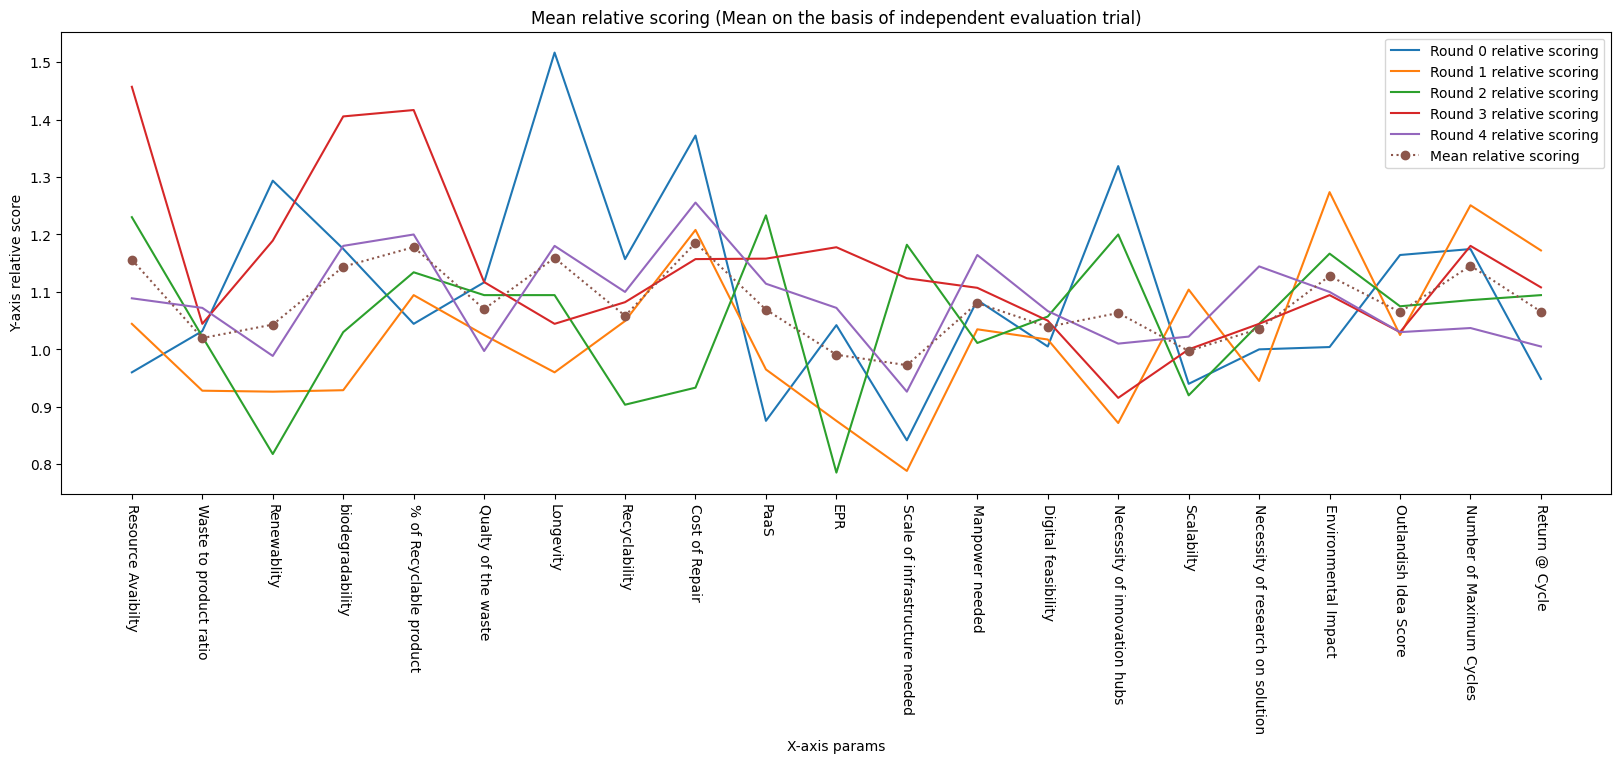

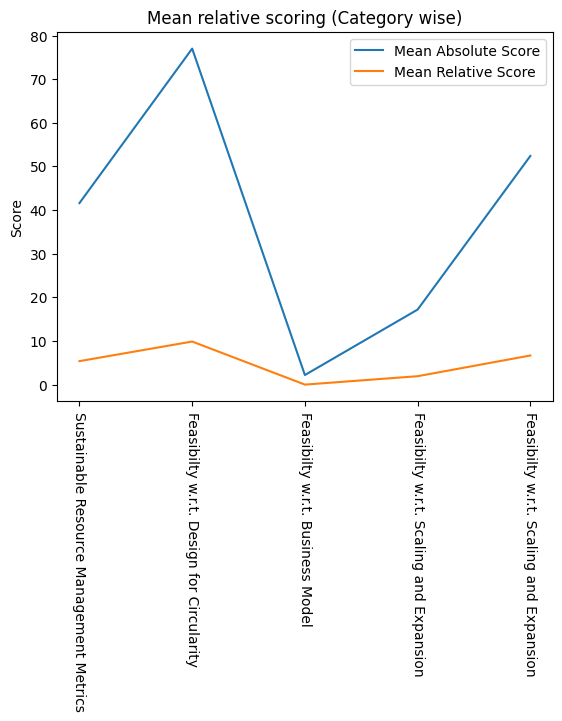

Aggregated Abs Score:  190.4
Aggregated Rel Score:  2.387338383838384
Outlandish Rel Score:  5.581923879707487


In [ ]:
run(ref,aieval)

In [ ]:
# """
# params = [

#   Sustainable Resource Management Metrics
#     "Resource Avaibilty",             ->  +2
#     "Waste to product ratio",       ->   +2
#     "Renewablity",                      ->   +2
#     "biodegradability",                 ->   +1


#     Feasibilty w.r.t. Design for Circularity
#     "% of Recyclable product",     ->   +2
#     "Qualty of the waste",            -> +3
#     "Longevity",             ->  +2
#     "Recyclability",             ->  +3
#     "Cost of Repair",             ->  -1


#     Feasibilty w.r.t. Business Model
#     "PaaS",              ->  +1
#     "EPR",             ->  +1
#     "Scale of infrastructure needed",             ->  -1
#     "Manpower needed",             ->  -1


#     Feasibilty w.r.t. Scaling and Expansion
#     "Digital feasibility",      -> +1
#     "Necessity of innovation hubs",    ->  -1
#     "Scalabilty",  -> +3
#     "Necessity of research on solution",  -> -1

#     Feasibilty w.r.t. Others
#     "Environmental Impact",  -> +2
#     "Outlandish Idea Score",  -> +1
#     "Number of Maximum Cycles",  -> +2
#     "Return @ Cycle"  -> +1
# ]

# """